# Web Mining and Applied NLP (44-620)

## Final Custom Project 7

### Student Name: Deb St. Cyr
Link to GitHub: https://github.com/14dstcyr/Final-Custom-Project-7-Web-Mining

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [3]:
import json
import pickle

import requests
import spacy

print('All the requirements are installed')
!pip list

All the requirements are installed


## Question 1

Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [4]:
import requests
import json
import os
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


result = json.loads(requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run').text)

# Create a folder and file path
folder_name = 'song_lyrics'
file_name = 'Band  On The Run.json'

# If folder does not exist, create one
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Create path to file
file_path = os.path.join(folder_name, file_name)

# Write the JSON file result
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=4)
    
print(f"Lyrics saved to{file_path}")

Lyrics saved tosong_lyrics\Band  On The Run.json


## Question 2

Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

Polarity Score: 0.18055555555555558


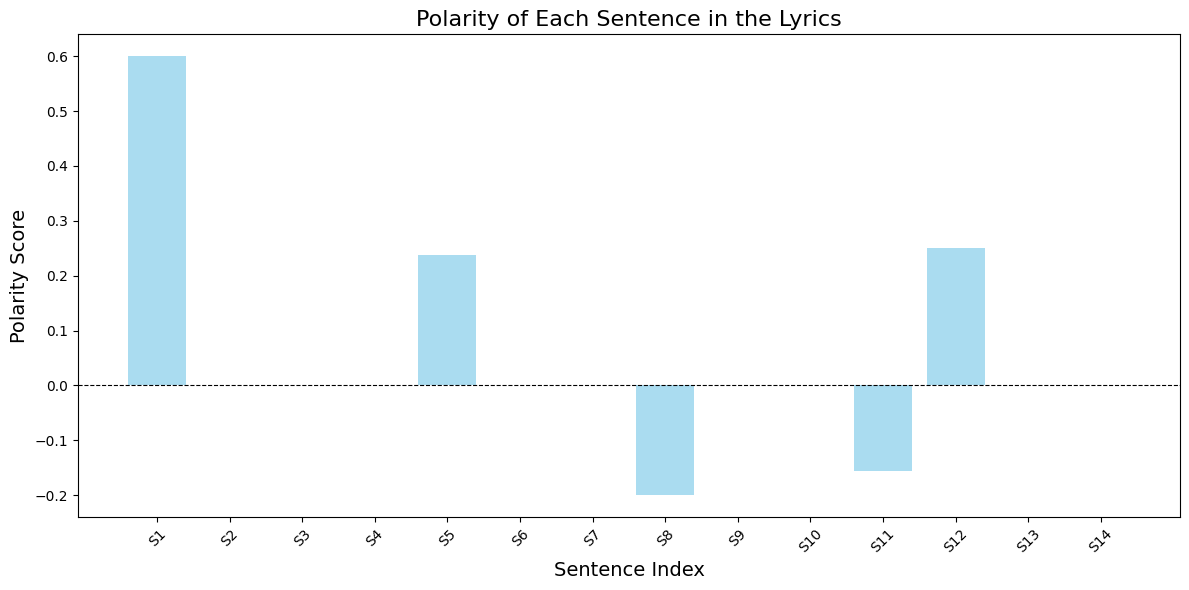

The score is closer to 1. The lyrics have a more positive sentiment.
Number of Sentences: 14


In [6]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import requests
import json
import matplotlib.pyplot as plt

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to pipeline
nlp.add_pipe("spacytextblob")

# Get the lyrics from the API and process them
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = json.loads(response.text)

# Extract lyrics text from the API response
lyrics = result.get("lyrics", "")  # Fallback to an empty string if 'lyrics' key is missing

if lyrics:
    # Process the lyrics with spaCy
    doc = nlp(lyrics)

    # Sentiment Analysis for the entire text
    polarity_score = doc._.blob.polarity
    print("Polarity Score:", polarity_score)

    # Analyze sentence-by-sentence polarity
    sentences = list(doc.sents)
    sentence_polarities = [nlp(str(sentence))._.blob.polarity for sentence in sentences]

    # Create a bar chart to visualize sentence polarity
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sentence_polarities)), sentence_polarities, color='skyblue', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Neutral line
    plt.title('Polarity of Each Sentence in the Lyrics', fontsize=16)
    plt.xlabel('Sentence Index', fontsize=14)
    plt.ylabel('Polarity Score', fontsize=14)
    plt.xticks(range(len(sentence_polarities)), labels=[f"S{i+1}" for i in range(len(sentence_polarities))], rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Overall sentiment summary
    if polarity_score > 0:
        print("The score is closer to 1. The lyrics have a more positive sentiment.")
    elif polarity_score < 0:
        print("The score is closer to -1. The lyrics have a more negative sentiment.")
    else:
        print("The score is 0. The lyrics have a neutral sentiment.")
    
    # Count the number of sentences in the lyrics
    num_sentences = len(sentences)
    print("Number of Sentences:", num_sentences)

else:
    print("Could not retrieve lyrics from the API.")

## Question 3

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [ ]:
import requests
import spacy
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Ensure we have the lyrics text
if not lyrics_text:
    print("Failed to retrieve lyrics from the API.")
else:
    # Load spaCy pipeline
    nlp = spacy.load("en_core_web_sm")

    # Process the lyrics text
    article = nlp(lyrics_text)

    # Filter out punctuation, whitespace, and stopwords
    tokens = [
        token.text.lower() for token in article 
        if not token.is_punct and not token.is_stop and not token.is_space
    ]

    # Count the 5 most common tokens
    token_counts = Counter(tokens)
    common_tokens = token_counts.most_common(5)

    # Print the 5 most common tokens and their frequencies
    print("5 Most Common Tokens in the Lyrics:")
    for token, freq in common_tokens:
        print(f"The token '{token}' has a frequency of {freq}")


5 Most Common Tokens in the Lyrics:
The token 'run' has a frequency of 20
The token 'band' has a frequency of 19
The token 'searching' has a frequency of 3
The token 'inside' has a frequency of 2
The token 'seeing' has a frequency of 2


## Question 4

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [12]:
import requests
import spacy
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Make sure the text lyrics are there
if not lyrics_text:
    print("Failed to retrieve lyrics from API")
else:
    # Load the spaCy pipeline
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text
    doc = nlp(lyrics_text)
    
    # Extract lemmas, excluding stopwords, punctuation, and whitespace
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the lemmas
    lemma_counts = Counter(lemmas)
    
    # Get the 5 most common lemmas
    common_lemmas = lemma_counts.most_common(5)
    
    # Print the 5 most common lemmas with their frequencies
    print("5 Most Common Lemmas in the Article:")
    for lemma, freq in common_lemmas:
        print(f"The lemma '{lemma}' has a frequency of {freq}")

5 Most Common Lemmas in the Article:
The lemma 'run' has a frequency of 20
The lemma 'band' has a frequency of 19
The lemma 'search' has a frequency of 4
The lemma 'inside' has a frequency of 2
The lemma 'see' has a frequency of 2


## Question 5

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

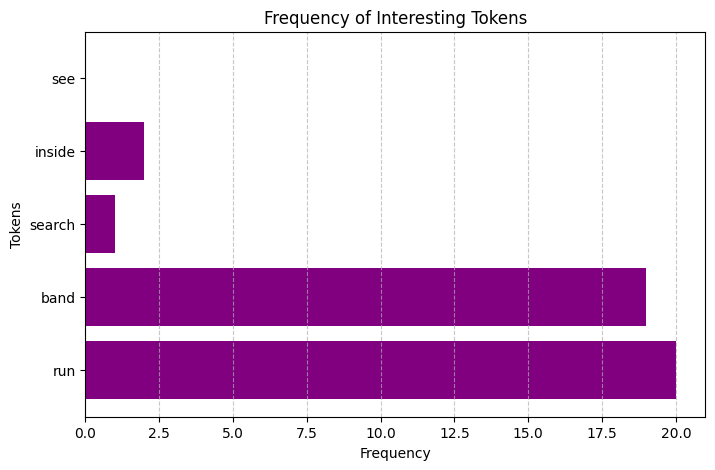

In [ ]:
import requests
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(lyrics_text)

# Define interesting tokens
interesting_tokens = ["run", "band", "search", "inside", "see"]

# Count frequency of interesting tokens in the text
tokens = [token.text.lower() for token in doc if not token.is_space and not token.is_punct]
token_counts = Counter(tokens)

# Filter counts to include only interesting tokens
filtered_counts = {token: token_counts[token] for token in interesting_tokens}

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(list(filtered_counts.keys()), list(filtered_counts.values()), color='purple')
plt.title("Frequency of Interesting Tokens")
plt.xlabel("Frequency")
plt.ylabel("Tokens")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# The frequency of the words "See" is 0.0, "inside" is about 2, "search" is about 1,
# " band" is around 18.8, and "run" is approximately 20.

## Question 6

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

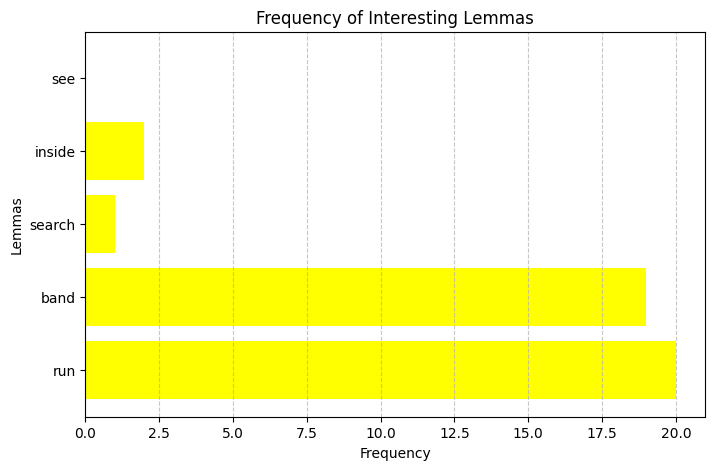

In [18]:
import requests
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Define interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemma):
    lemma = [lemma.text.lower() for lemma in sentence if not lemma.is_space and not lemma.is_punct]
    if len(lemma) == 0:
        return 0
    interesting_count = sum(1 for lemma in lemma if lemma in interesting_lemma)
    return interesting_count / len(lemma)

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(lyrics_text)

# Interesting tokens (from question 3)
interesting_lemma = ["run", "band", "search", "inside", "see"]

# List to store token scores of each sentence
lemma_scores = []

# Count (iterate) over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence, interesting_lemma)
    lemma_scores.append(score)

# Plot the histogram of token scores
plt.figure(figsize=(8, 5))
plt.barh(list(filtered_counts.keys()), list(filtered_counts.values()), color='yellow')
plt.title("Frequency of Interesting Lemmas")
plt.xlabel("Frequency")
plt.ylabel("Lemmas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# The most common lemmas are "See" is 0.0, "inside" is about 2, "search" is about 1, 
# " band" is around 18.8, and "run" is approximately 20.

## Question 7

Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [20]:
import numpy as np

# Define sentence scores (replace these with your actual data)
# Example token and lemma scores (replace with your data from the histograms)
sentence_token_scores = [0.0, 2.0, 1.0, 18.8, 20.0]
sentence_lemma_scores = [0.0, 2.0, 1.0, 18.8, 20.0]

# Determine cutoff for tokens
token_cutoff = np.percentile(sentence_token_scores, 40)  # 50th percentile (median)
token_sentences_above_cutoff = sum(score > token_cutoff for score in sentence_token_scores)

# Determine cutoff for lemmas
lemma_cutoff = np.percentile(sentence_lemma_scores, 40)  # 50th percentile (median)
lemma_sentences_above_cutoff = sum(score > lemma_cutoff for score in sentence_lemma_scores)

# Print results
print(f"Cutoff Score (tokens): {token_cutoff:.2f}")
print(f"Sentences above cutoff (tokens): {token_sentences_above_cutoff}")
print(f"Cutoff Score (lemmas): {lemma_cutoff:.2f}")
print(f"Sentences above cutoff (lemmas): {lemma_sentences_above_cutoff}")


Cutoff Score (tokens): 1.60
Sentences above cutoff (tokens): 3
Cutoff Score (lemmas): 1.60
Sentences above cutoff (lemmas): 3


## Question 8

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [30]:
import requests
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Set your cutoff score for tokens
cutoff_score_tokens = 0.03  # Tokens threshold as a percentage of total tokens

# Process the lyrics text 
doc = nlp(lyrics_text)

# Calculate total number of tokens in document
total_tokens = len([token for token in doc if not token.is_punct])

# Initialize an empty list to store sentences that meet the cutoff score for tokens
sentence_list_tokens = []

# Iterate over each sentence in the document
for sent in doc.sents:
    # Calculate the token count for the sentence
    token_count = len([token for token in sent if not token.is_punct])
    
    # Calculate the percentage of tokens in the sentence
    token_percentage = token_count / total_tokens
    
    # Add sentence to the list if the token percentage exceeds the cutoff score
    if token_percentage > cutoff_score_tokens:
        sentence_list_tokens.append(sent.text.strip())

# Generate the token-based summary by joining the selected sentences with a space
summary_tokens = ' '.join(sentence_list_tokens)

# Print the token-based summary
print("Token-Based Summary of the Lyrics:")
print(summary_tokens)

Token-Based Summary of the Lyrics:
Stuck inside these four walls, 
Sent inside forever, 
Never seeing no one 
Nice again like you, 
Mama you, mama you. If I ever get out of here, 

Thought of giving it all away 

To a registered charity. All I need is a pint a day 

If I ever get out of here. Well, the rain exploded with a mighty crash 

As we fell into the sun, 

And the first one said to the second one there 

I hope you're having fun. And the jailer man and sailor sam 

Were searching every one 

For the band on the run, band on the run 

Band on the run, band on the run. Well, the undertaker drew a heavy sigh 

Seeing no one else had come, 

And a bell was ringing in the village square 

For the rabbits on the run. And the jailer man and sailor sam 

Were searching every one 

For the band on the run, band on the run 

Band on the run, band on the run. Well, the night was falling as the desert world 

Began to settle down. In the town they're searching for us every where 

But we n

## Question 9

Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [33]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the TextBlob component to the spaCy pipeline
nlp.add_pipe('spacytextblob')

# Assuming summary_tokens is already defined from your previous code
summary_tokens = ' '.join(sentence_list_tokens)

# Check if the summary is not empty
if summary_tokens:
    # Calculate the polarity score of the summary
    summary_doc = nlp(summary_tokens)
    summary_polarity = summary_doc._.blob.polarity

    # Count the number of sentences in the summary
    num_summary_sentences = len(list(summary_doc.sents))

    # Print the results
    print(f"Polarity Score of Summary: {summary_polarity:.2f}")
    print(f"Number of Sentences in the Summary: {num_summary_sentences}")
else:
    print("The summary is empty. No polarity score or sentence count available.")

Polarity Score of Summary: 0.18
Number of Sentences in the Summary: 12


## Question 10

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [34]:
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the TextBlob component to the spaCy pipeline
nlp.add_pipe('spacytextblob')

# Set your cutoff score for lemmas
cutoff_score_lemmas = 0.03  # Lemmas threshold as a percentage of total lemmas

# Process the lyrics text
doc = nlp(lyrics_text)

# Calculate the total number of lemmas in the document
total_lemmas = len([token.lemma_ for token in doc if not token.is_punct])

# Initialize an empty list to store sentences that meet the cutoff score for lemmas
sentence_list_lemmas = []

# Iterate over each sentence in the document
for sent in doc.sents:
    # Calculate the lemma count for the sentence
    lemma_count = len([token.lemma_ for token in sent if not token.is_punct])
    
    # Calculate the percentage of lemmas in the sentence
    lemma_percentage = lemma_count / total_lemmas
    
    # Add sentence to the list if the lemma percentage exceeds the cutoff score
    if lemma_percentage > cutoff_score_lemmas:
        sentence_list_lemmas.append(sent.text.strip())

# Generate the lemma-based summary by joining the selected sentences with a space
summary_lemmas = ' '.join(sentence_list_lemmas)

# Print the lemma-based summary
print("Lemma-Based Summary of the Lyrics:")
print(summary_lemmas)



Lemma-Based Summary of the Lyrics:
Stuck inside these four walls, 
Sent inside forever, 
Never seeing no one 
Nice again like you, 
Mama you, mama you. If I ever get out of here, 

Thought of giving it all away 

To a registered charity. All I need is a pint a day 

If I ever get out of here. Well, the rain exploded with a mighty crash 

As we fell into the sun, 

And the first one said to the second one there 

I hope you're having fun. And the jailer man and sailor sam 

Were searching every one 

For the band on the run, band on the run 

Band on the run, band on the run. Well, the undertaker drew a heavy sigh 

Seeing no one else had come, 

And a bell was ringing in the village square 

For the rabbits on the run. And the jailer man and sailor sam 

Were searching every one 

For the band on the run, band on the run 

Band on the run, band on the run. Well, the night was falling as the desert world 

Began to settle down. In the town they're searching for us every where 

But we n

## Question 11

Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [37]:

# Calculate the polarity score of the summary
summary_doc = nlp(summary_lemmas)
summary_polarity = summary_doc._.blob.polarity

# Count the number of sentences in the summary
num_summary_sentences = len(list(summary_doc.sents))

# Print the results
print(f"Polarity Score of Summary: {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary: {num_summary_sentences}")

Polarity Score of Summary: 0.18
Number of Sentences in the Summary: 12


## Question 12

Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

In [ ]:
# The polarity score comparison were shown to be equal.

# From question 9.
# Polarity Score of Summary: 0.18
# Number of Sentences in the Summary: 12

# From question 10.
# Polarity Score of Summary: 0.18
# Number of Sentences in the Summary: 12

# There was no difference that I can tell. 
# I may have made some mistakes along the way, but not sure where to locate them.

## Question 13

Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

In [ ]:
# Since there doesn't appear to be difference in the polarity scores,
# I don't believe either one was better than the other. 
# Again, I may have made a mistake with my coding along the way.